In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2024-08-29 11:25:59.401627: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 11:25:59.401766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 11:25:59.549302: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import io
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='PIL')

In [3]:
from collections import Counter

X_train = []
Y_train = []

image_size = 150

labels = ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']

# Dictionary to store counts of each label
label_counts = {label: 0 for label in labels}

# Process training images
for label in labels:
    folderPath = os.path.join('/kaggle/input/soil-types-dataset/Dataset/Train', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)
        label_counts[label] += 1

# Process test images
for label in labels:
    folderPath = os.path.join('/kaggle/input/soil-types-dataset/Dataset/test', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)
        label_counts[label] += 1

# Print each label with its count
for label, count in label_counts.items():
    print(f"{label}: {count}")

X_train = np.array(X_train)
Y_train = np.array(Y_train)

Alluvial soil: 576
Black Soil: 344
Clay soil: 262
Red soil: 373


In [4]:
# Shuffle the training data and labels
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Check the shape of the training data
print("Shuffled training data shape:", X_train.shape)

Shuffled training data shape: (1555, 150, 150, 3)


In [5]:
#Print the number of samples in the training data

print("Number of samples in the training data:", len(X_train))

Number of samples in the training data: 1555


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Display the shape of the train and test sets
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (1399, 150, 150, 3)
Test data shape: (156, 150, 150, 3)
Training labels shape: (1399,)
Test labels shape: (156,)


Data Augumentation


In [ ]:
# Encode y_train labels
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train,num_classes=4)

# Encode y_test labels
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
    print(y_test_new)
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test,num_classes=4)

In [9]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# #Scaling 
# def process(image,label):
#     image = tensorflow.cast(image/255. ,tensorflow.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)


#Generators=Dividing the dataset into the smaller chucks for the models
train_ds= train_datagen.flow(
        X_train, y_train, batch_size=32,
)

validation_ds = validation_datagen.flow(
        X_test, y_test, batch_size=32,)

Convolutional Neural Network

In [ ]:
# model = Sequential()
# model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(512,activation = 'relu'))
# model.add(Dense(512,activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(4,activation='softmax'))

In [ ]:
# model.summary()

In [11]:
validation_ds

**Transfer Learning (Feature Extraction):**

In [12]:
# from keras.applications.vgg16 import VGG16

# conv_base = VGG16(
#     weights='imagenet',
#     include_top = False,
#     input_shape=(150,150,3)
# )

# model = Sequential()

# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(512,activation = 'relu'))
# model.add(Dense(256,activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(4,activation='softmax'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.applications.vgg16 import VGG16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Assuming X_train, y_train, X_test, y_test are already defined

train_ds = train_datagen.flow(
    X_train, y_train, batch_size=32
)

validation_ds = validation_datagen.flow(
    X_test, y_test, batch_size=32
)

# Model Architecture
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Training the model
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=validation_ds
)


**Transfer Learning with fine tuning**

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model Architecture
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Training the model
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=validation_ds
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# conv_base.trainable = True

# set_trainable = False

# for layer in conv_base.layers:
#   if layer.name == 'block5_conv1':
#     set_trainable = True
#   if set_trainable:
#     layer.trainable = True
#   else:
#     layer.trainable = False

# for layer in conv_base.layers:
#   print(layer.name,layer.trainable)

In [ ]:
# model = Sequential()

# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(256,activation='relu'))
# model.add(Dense(4,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# history = model.fit(
#     train_ds,
#     epochs = 10,
#     validation_data = validation_ds,
#     )

In [ ]:
# history = model.fit(X_train,Y_train,validation_data=(X_test,y_test),epochs=20)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

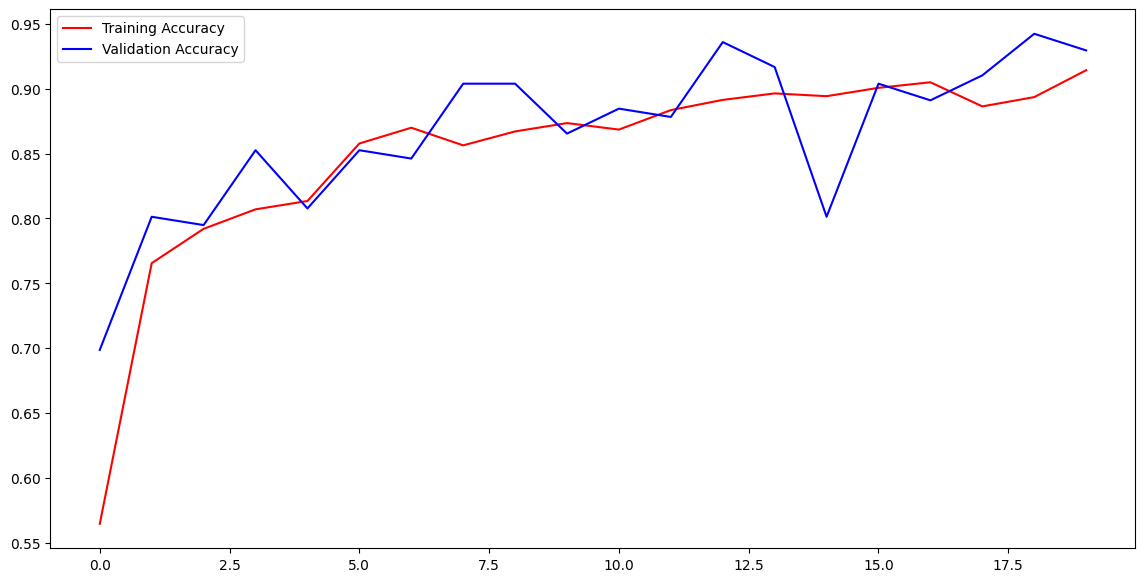

In [23]:
#model.save('soil_crop_recomendar.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

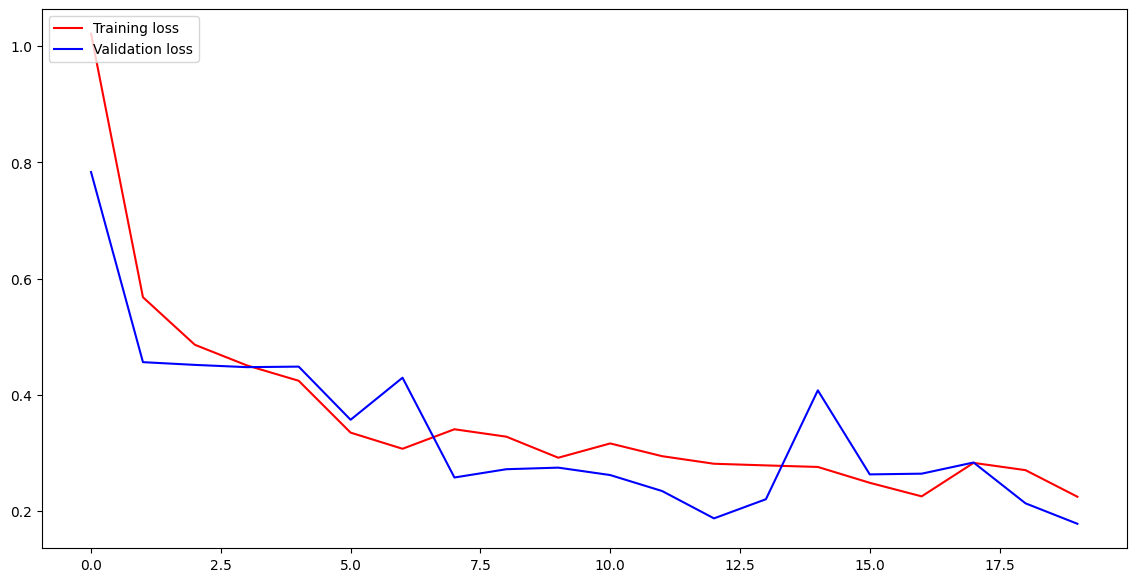

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [28]:
model.save('/kaggle/working/my_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:

model.save('/kaggle/working/my_model.keras')

## Testing Part

In [25]:
image_path="/kaggle/input/soil-types-dataset/Dataset/test/Red soil/Copy of image-red-soil-texture-260nw-243951718.png"
img = cv2.imread(image_path)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [26]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

Selected image: /kaggle/input/soil-types-dataset/Dataset/Train/Alluvial soil/photo_2022-06-01_07-08-33.jpg


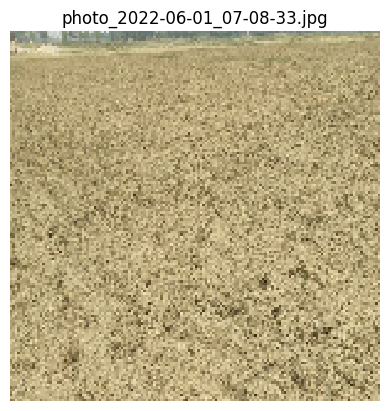

Original image shape: (150, 150, 3)
Expanded image shape: (1, 150, 150, 3)
Normalized image shape: (1, 150, 150, 3)
1/1 [==============================] - 0s 154ms/step
Prediction array: [[0.89364547 0.05035798 0.05099776 0.00499871]]
Predicted class index: 0
Soil Type: Alluvial soil
{This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute}


In [27]:
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

base_directory = '/kaggle/input/soil-types-dataset/Dataset/Train'

subdirectories = ['Alluvial soil', 'Red soil', 'Black Soil', 'Clay soil']

all_image_files = []
for subdir in subdirectories:
    directory = os.path.join(base_directory, subdir)
    files = os.listdir(directory)
    image_files = [os.path.join(directory, f) for f in files if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    all_image_files.extend(image_files)

random_file = random.choice(all_image_files)
print(f"Selected image: {random_file}")  

img = image.load_img(random_file, target_size=(150, 150))  

plt.imshow(img, interpolation='nearest')
plt.axis("off")  
plt.title(os.path.basename(random_file))  
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)  
print(f"Original image shape: {img_array.shape}")  

img_array = np.expand_dims(img_array, axis=0) 
print(f"Expanded image shape: {img_array.shape}")  

img_array = img_array / 255.0  
print(f"Normalized image shape: {img_array.shape}")  

a = model.predict(img_array)
print(f"Prediction array: {a}")  

indices = a.argmax()
print(f"Predicted class index: {indices}") 

labels = ["Alluvial soil", "Black Soil", "Clay soil", "Red soil"]  

soil = {
    "Alluvial soil": "{This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute}",
    "Black Soil": "{This soil is suitable for crops: Wheat, Virginia, Jowar, Millets, Linseed, Castor, Sunflower}",
    "Clay soil": "{This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap, Beans}",
    "Red soil": "{This soil is suitable for crops: Cotton, Pulses, Millets, OilSeeds, Potatoes}",
}

if labels[indices] in soil.keys():
    print("Soil Type:", labels[indices])
    print(soil[labels[indices]])


1/1 [==============================] - 0s 114ms/step


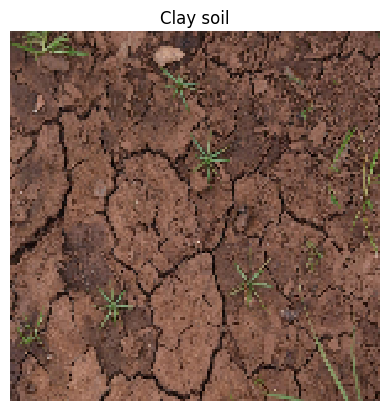

Soil Type: Clay soil
Clay soil has a fine texture and high nutrient content. It is best for crops like lettuce, spinach, cabbage, carrots, and beans. It retains water and nutrients but can be prone to waterlogging.


In [33]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the model
model_path = '/kaggle/working/my_model.h5'  # Update this if using a different format or name
model = load_model(model_path)

def classify_soil(image_path):
    # Load and preprocess the image using OpenCV
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))  # Resize the image to (150, 150)
    img_array = np.array(img)
    
    # Reshape and normalize the image
    img_array = img_array.reshape(1, 150, 150, 3)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

    # Predict the class of the image
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    
    # Define labels and soil descriptions
    labels = ["Alluvial soil", "Black Soil", "Clay soil", "Red soil"]
    soil_descriptions = {
    "Alluvial soil": "Alluvial soil is fertile and supports a wide range of crops. It's suitable for growing rice, wheat, sugarcane, maize, cotton, and jute. This soil is found in river valleys and deltas, enriched by sediment deposition.",
    "Black Soil": "Black soil, also known as Regur soil, is rich in iron, lime, and magnesium. It is ideal for crops such as cotton, groundnut, sunflower, sorghum, and pulses. It retains moisture well and is prevalent in volcanic regions.",
    "Clay soil": "Clay soil has a fine texture and high nutrient content. It is best for crops like lettuce, spinach, cabbage, carrots, and beans. It retains water and nutrients but can be prone to waterlogging.",
    "Red soil": "Red soil is rich in iron oxides, giving it a reddish color. It is suitable for crops such as millets, pulses, oilseeds, potatoes, and certain fruits. It often requires additional fertilizers for optimal crop growth."
    }


    # Display the image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(img_rgb, interpolation='nearest')
    plt.axis("off")
    plt.title(labels[class_index])
    plt.show()

    # Return the result
    soil_type = labels[class_index]
    description = soil_descriptions.get(soil_type, "No description available.")
    return soil_type, description

# Example usage
image_path = '/kaggle/input/my-data/WhatsApp Image 2024-08-29 at 17.58.06.jpeg'  # Update with the correct image path
soil_type, description = classify_soil(image_path)
print(f"Soil Type: {soil_type}")
print(description)
